# Trends and Differences Found in Steam Games
##### Ryan Don | 100824494
<div>
    <img src="https://cdn.akamai.steamstatic.com/store/home/store_home_share.jpg" width="800" height="400"/>
</div>

Steam can be seen as a comprehensive database of nearly every modern game created in recent history. In this notebook, the trends found through games released to steam over the past ~24 years will be analyzed, in hopes to see possible evidence of how game standards and practices have changed.</br>
The [datafile](#datafile) we will be using contains information of every game released to steam, ie. genre, price, number of recommendations, etc.</br>
This file will be used to find trends between game genres, the release dates, review scored given by <a href="https://www.metacritic.com/">Metacritic</a>, and game prices. Some general questions 
that will hopefully be answered are; how have the review scores of games changed over the years? How have the prices of games changed? What does the average price look like for each genre?</br>
The implications of findings will then be discussed, inferring possible explanations for the trends found.

---
## INDEX
[ANALYSIS](#analysis)</br>
L [CLEANING](#cleaning)</br>
└ [PLOTTING](#plotting)</br>
[DISCUSSION](#discussion)</br>
##
---

In [84]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import csv, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id='datafile'></a>
Here, the datafile will be loaded and the main dataframe will be instantiated

In [85]:
file = pd.read_csv('data.csv')
df = pd.DataFrame()
file

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


# ANALYSIS
---
## CLEANING
Some flaws were found in the datafile. Notably, there are numerous similar entries. These cannot be removed through a simple built in function, as the duplicate titles each have slightly different text. The cell below will remove any consecutive elements that have more than 20 characters in common.

In [86]:
#has an approximately 45sec runtime
df = pd.DataFrame()

i=0
while(i<len(file)-1):
    j=i+1
    while(j<len(file)):
        if(file['ResponseName'][i][:12] != file['ResponseName'][j][:12]):  
            i = j
            break
        else:
            j+=1
    df = df.append(file.iloc[i], ignore_index=True)

print('finished!')
print('Removed', (len(file) - len(df)), 'similar entries.')

finished!
Removed 951 similar entries.


Furthermore, the game genres are represented through 12 unnecessary boolean columns, each showing if it's respective game either is or isn't of that genre. The genre is then allocated to a single column, containing lists of each genre the game corresponds to.

In [87]:
#clean up data by putting the genres of a row into a list, put that list into a new column. makes for easier readability
columndata = []
for i in range(0,len(df)):
    pack = []
    if(df['GenreIsNonGame'][i]):
        pack.append("NonGame")
        
    if(df['GenreIsIndie'][i]):
        pack.append("Indie")

    if(df['GenreIsAction'][i]):
        pack.append("Action")

    if(df['GenreIsAdventure'][i]):
        pack.append("Adventure")

    if(df['GenreIsCasual'][i]):
        pack.append("Casual")

    if(df['GenreIsStrategy'][i]):
        pack.append("Strategy")

    if(df['GenreIsRPG'][i]):
        pack.append("RPG")

    if(df['GenreIsSimulation'][i]):
        pack.append("Simulation")

    if(df['GenreIsEarlyAccess'][i]):
        pack.append("EarlyAccess")

    if(df['GenreIsFreeToPlay'][i]):
        pack.append("FreeToPlay")

    if(df['GenreIsSports'][i]):
        pack.append("Sports")

    if(df['GenreIsRacing'][i]):
        pack.append("Racing")

    if(df['GenreIsMassivelyMultiplayer'][i]):
        pack.append("MassivelyMultiplayer")

    columndata.append(pack)

df['Genre'] = columndata
df = df.drop(['GenreIsNonGame','GenreIsIndie','GenreIsAction','GenreIsAdventure','GenreIsCasual','GenreIsStrategy','GenreIsRPG','GenreIsSimulation','GenreIsEarlyAccess','GenreIsFreeToPlay','GenreIsSports','GenreIsRacing','GenreIsMassivelyMultiplayer'],axis=1)
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,PriceInitial,Genre
0,Team Fortress Classic,Apr 1 1999,0,2439,False,4.99,[Action]
1,Day of Defeat,May 1 2003,79,2319,False,4.99,[Action]
2,Deathmatch Classic,Jun 1 2001,0,888,False,4.99,[Action]
3,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,4.99,[Action]
4,Ricochet,Nov 1 2000,0,1965,False,4.99,[Action]
...,...,...,...,...,...,...,...
11668,ObserVR Beta,Oct 26 2016,0,0,True,0.00,"[NonGame, EarlyAccess]"
11669,One Night Stand,NaN,0,0,False,0.00,"[Indie, Casual, Simulation]"
11670,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,2.99,"[Indie, Casual]"
11671,Charm Tale Quest,Oct 27 2016,0,0,False,2.99,"[Indie, Casual]"


### The next two cells serve the purpose of creating dataframes that allow for comparisons later in the analysis.
The genredf dataframe is built first, which takes the lists of genres previously created for each entry, instead making an entry for each of its' genres.

In [88]:
#approximately 2m runtime
genredf = pd.DataFrame()
for i in range(0,len(df)):
    for j in range(0,len(df.loc[i]['Genre'])):
        temp = df.loc[i]
        temp['Genre'] = str(df.loc[i]['Genre'][j])
        genredf = genredf.append(temp, ignore_index=True)
    if(i % 100 == 0):
        print(i,"/",len(df), end="\r")
print("Done! created genredf dataframe with",len(genredf),"entries.")
genredf.head()

C:\Users\rjdon\AppData\Local\Temp\ipykernel_19736\2411217538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Genre'] = str(df.loc[i]['Genre'][j])


Done! created genredf dataframe with 29462 entries.


,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,PriceInitial,Genre
0,Team Fortress Classic,Apr 1 1999,0,2439,False,4.99,Action
1,Day of Defeat,May 1 2003,79,2319,False,4.99,Action
2,Deathmatch Classic,Jun 1 2001,0,888,False,4.99,Action
3,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,4.99,Action
4,Ricochet,Nov 1 2000,0,1965,False,4.99,Action


The datedf dataframe is a slightly modified version of the genredf one, with the 'ReleaseDate' column being changed to contain only dates that have numeric values (removing any that consist of text along the lines of "Coming soon!" and whatnot).

In [89]:
datedf = genredf
for i in range(0,len(datedf)):
    if(type(datedf['ReleaseDate'][i]) == str):
        datedf['ReleaseDate'][i] = datedf['ReleaseDate'][i][-4:]

datedf = datedf[datedf['ReleaseDate'].str.contains('^[0-9]*$',na=False)]

C:\Users\rjdon\AppData\Local\Temp\ipykernel_19736\43692302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datedf['ReleaseDate'][i] = datedf['ReleaseDate'][i][-4:]


## PLOTTING
There were numerous questions I was interested in answering. The metacritic score and steam recommendations will be used to show the general popularity of each group, and the price and differences between genres/release dates will also be looked at.

To begin, the overall distribution of metacritic score for all games is shown. Any scores that are zero will be truncated, as there are plenty of entries that were never reviewed my metacritic.

[Text(0.5, 1.0, 'Overall Metacritic Score Distribution'),
 Text(0.5, 0, 'Metacritic % Score'),
 Text(0, 0.5, 'Count')]

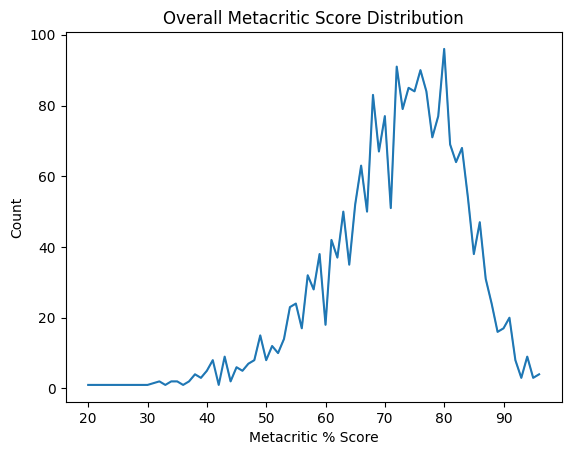

In [90]:
sns.lineplot(x=df[df['Metacritic']>0]['Metacritic'],y=df['Metacritic'].map(df['Metacritic'].value_counts())).set(title='Overall Metacritic Score Distribution',xlabel='Metacritic % Score', ylabel='Count')

The distribution of metacritic scores for each genre:

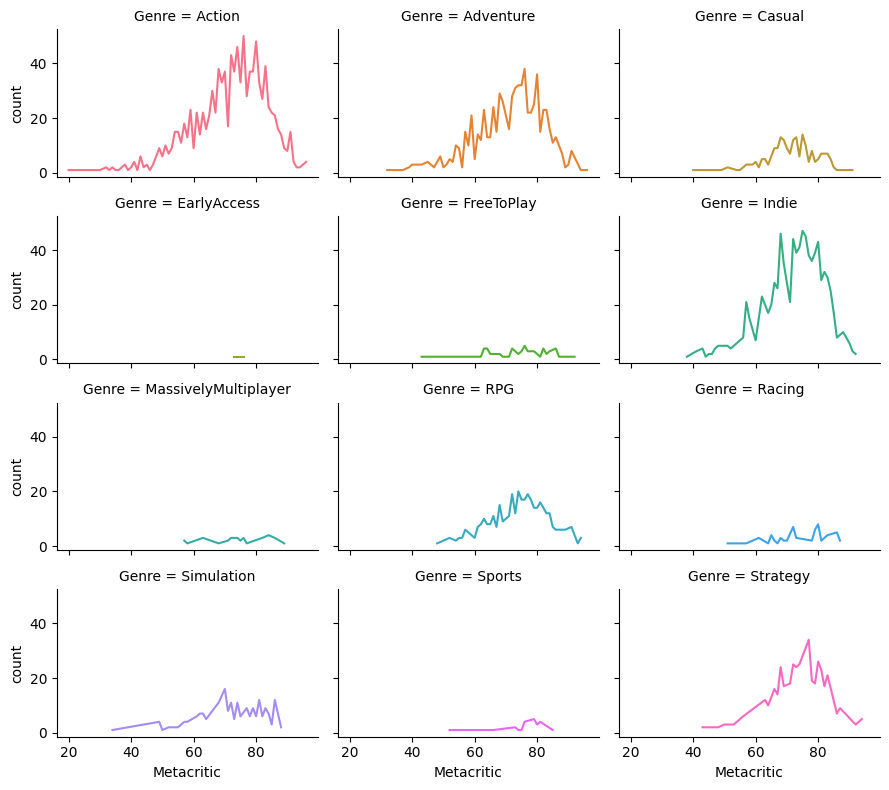

In [91]:
mcgdf = genredf[genredf['Metacritic'] > 0][['Metacritic','Genre']]
mcgdf = pd.DataFrame(mcgdf.groupby(['Genre','Metacritic'])['Metacritic'].count()).rename(columns={'Metacritic': 'count'}).reset_index(level=1)
mcgdf = mcgdf.drop_duplicates()
sns.relplot(data=mcgdf,x='Metacritic',y='count',col='Genre',hue='Genre',kind='line',col_wrap=3,height=2,zorder=5,aspect=1.5,legend=False).set()

Plotting each of these on the same plot shows that every genre follows a very similar curve.

<AxesSubplot: xlabel='Metacritic', ylabel='count'>

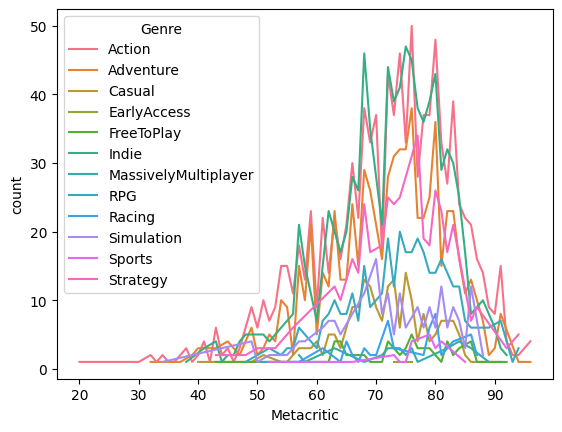

In [92]:
sns.lineplot(x='Metacritic',y='count',data=mcgdf, hue='Genre')

Now, we see the popularity of each genre shown through the amount of steam recommendations each typically gets.

[]

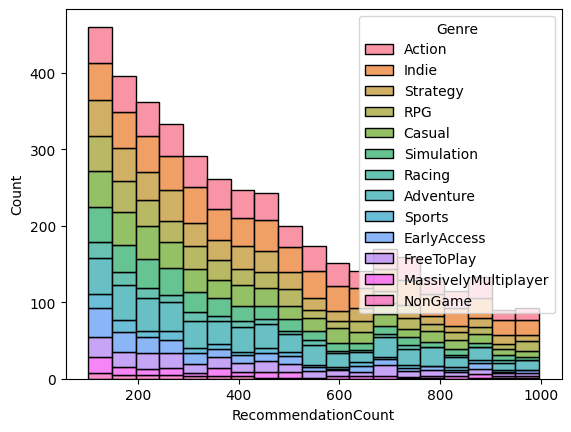

In [93]:
rcdf = genredf[(genredf['RecommendationCount'] < 1000 )&(genredf['RecommendationCount'] > 0)][['RecommendationCount','Genre']]
rcdf['Count'] = rcdf['RecommendationCount'].map(rcdf['RecommendationCount'].value_counts())
rcdf = rcdf.drop_duplicates()
rcdf.pivot("RecommendationCount","Genre","Count")
sns.histplot(rcdf,x='RecommendationCount',hue='Genre', multiple='stack',element="bars").set()

The next plot shows the difference in prices most commonly found for each genre.

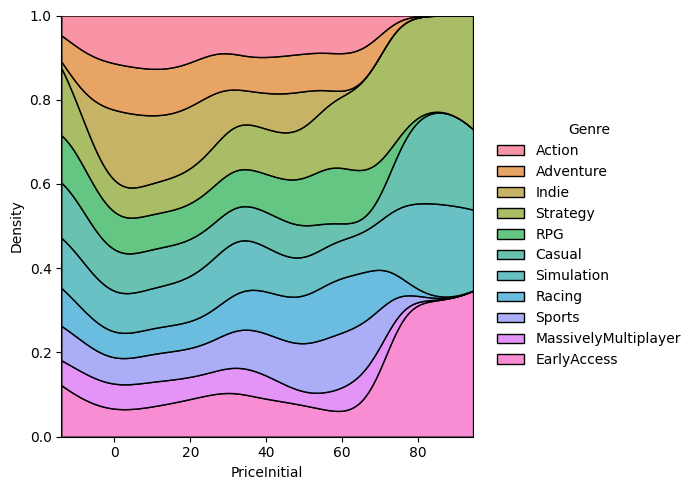

In [94]:
pricedf = genredf[(genredf['PriceInitial'] < 90)&(genredf['PriceInitial'] > 0)][['PriceInitial','Genre']]
pricedf['Count'] = pricedf['PriceInitial'].map(pricedf['PriceInitial'].value_counts())
pricedf = pricedf.drop_duplicates()
pricedf.pivot("PriceInitial","Genre","Count")
pricedf = pricedf[pricedf['Genre'].str.contains('FreeToPlay') == False]
pricedf = pricedf[pricedf['Genre'].str.contains('NonGame') == False]
sns.displot(data=pricedf,x='PriceInitial',hue='Genre',multiple='fill',kind='kde').set()

This was interesting to see, however I was curious as to what the mean prices were for each genre. This next plot shows the most/least expensive genres by their mean initial price.

[]

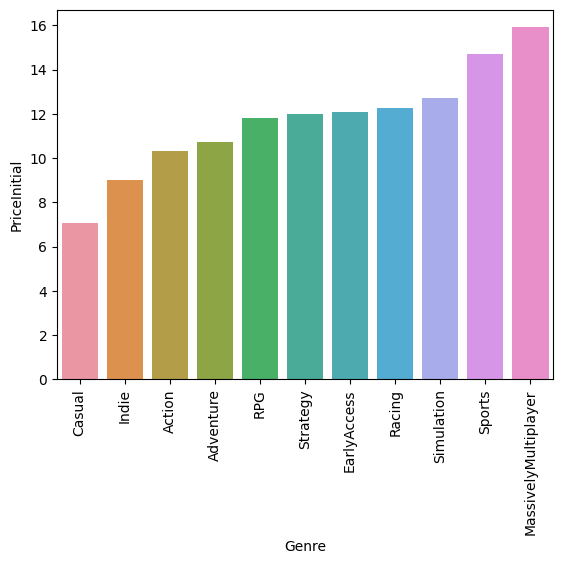

In [95]:
pricedist = genredf[(genredf['PriceInitial'] > 0)][['Genre','PriceInitial']].groupby('Genre').mean().drop('FreeToPlay').drop('NonGame')
pricedist = pricedist.sort_values('PriceInitial')
plot = sns.barplot(data=pricedist.reset_index(),x='Genre',y='PriceInitial')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set()

Now, we will look at the amount of games made over the years from each genre. You can see the gradual increase in production of each genre.

C:\Users\rjdon\AppData\Local\Temp\ipykernel_19736\2599153157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datedist['Count'] = datedist['ReleaseDate'].map(datedist['ReleaseDate'].value_counts())
C:\Users\rjdon\AppData\Local\Temp\ipykernel_19736\2599153157.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[]

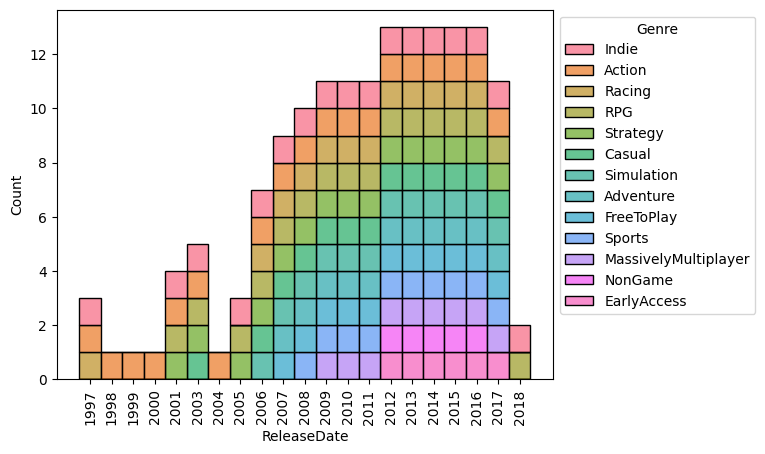

In [96]:
#showing the most popular genre each year
datedist = datedf[['ReleaseDate','Genre']]
datedist['Count'] = datedist['ReleaseDate'].map(datedist['ReleaseDate'].value_counts())
datedist = datedist.drop_duplicates()
datedist = datedist.sort_values('ReleaseDate')
datedist.pivot("ReleaseDate","Genre","Count")
plot = sns.histplot(datedist,x='ReleaseDate',hue='Genre', multiple='stack',element="bars")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1, 1))
plot.set()

This chart shows the progression of the mean price of games released each year. Duplicate games created from the analysis of each genre will be dropped, as they are no longer being looked at.

[]

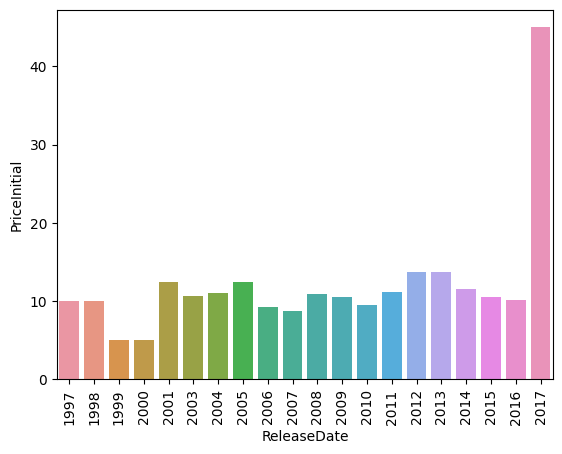

In [97]:
datedf = datedf.drop_duplicates(subset=['ResponseName'])
pricedate = datedf[(datedf['PriceInitial'] > 0)&(datedf['PriceInitial'] < 90)][['ReleaseDate','PriceInitial']].groupby('ReleaseDate').mean()
# pricedate = pricedate.sort_values('PriceInitial')
plot = sns.barplot(data=pricedate.reset_index(),x='ReleaseDate',y='PriceInitial')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set()

To conclude our analysis, the average metacritic score will be shown for each year.

[]

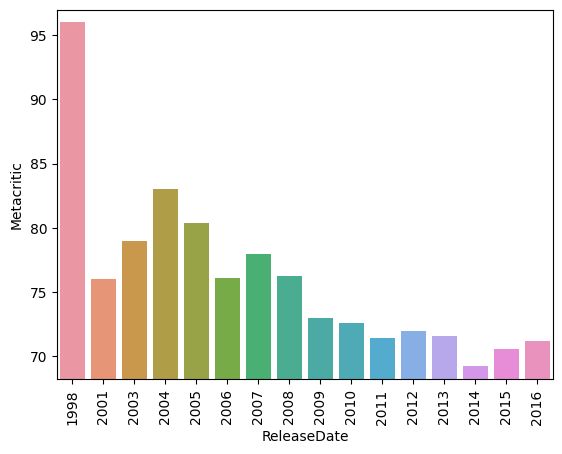

In [98]:
#plot the metacritic score of each year
mcdate = datedf[(datedf['Metacritic'] > 0)][['ReleaseDate','Metacritic']].groupby('ReleaseDate').mean()
plot = sns.barplot(data=mcdate.reset_index(),x='ReleaseDate',y='Metacritic')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylim(mcdate['Metacritic'].min()-1,mcdate['Metacritic'].max()+1)
plot.set()

## DISCUSSION
---

**Review Score and Game Popularity:**

The first portion analyzed was the distribution of the metacritic score. It was found to form a bell curve-like shape, with the most common score being 70%. When looking at the distribution of metacritic scores for each genre, it was found that each holds a very similar distribution, which could be easily seen when overlapping the plots. Some genres interestingly lacked any review scores below or above a certain threshold, but they would always correspond to the same line. This debunked the hypothesis that there would be genres that tend to be "better" or "worse" than one another, and shows that all genres seem to follow similar scores.

The plot showing the recommendation count for each genre is mainly interpreted to show that overall most games have relatively low counts. Looking to the far right end, however, it can surprisingly be seen that indie games have very high recommendation counts. This is interesting as those games typically don't have large publishers who can afford expensive marketing for the titles, meaning the games must have gotten popular through the simple means of being good.


**Game prices:**

When looking at the distribution of prices of games, it was seen that indie and action games tend to be the cheapest, while strategy, casual, simulation, and early access games dominate the higher end of prices. The other genres skewed off near the right side, and the aforementioned expensive titles bloated to fill this region. The notion of strategy and simulation games being expensive was expected, along with indie games being cheap. Casual games being expensive and action games being cheap came as a surprise, however, as they would be expected to be vice versa. The data presented here shows that highly saturated markets tend to fall into cheaper prices, while genres that cater to niche markets are free to be priced more expensively.

For a more readable and conclusive view of which genres tend to be cheaper/more expensive, a bar graph was shown to present the mean price for each. It was found that surprisingly casual and indie games are the overall cheapest, while sport and mmo games are more expensive. This contradicts what was found previously, as casual games were supposed to be among the most expensive. I realized this could be explained by the previous graph not showing the most common prices for each genre, but rather across the entire dataset. This concluded that while casual games took a large amount of the more expensive games, they still had a mean price which was much cheaper than the rest.


**Release Date Correlation:**

The amount of games that corresponded to each genre was then viewed, and how they changed over the years. It was seen that between 1997 and 2000, the only games tended to be in the action genre. In the early 2000s; indie, racing and strategy games were introduced to the market. Every other genre begain to rise in popularity soonafter, however mmos weren't being released until around 2009. It was seen that 2012 was the year steam received the most game additions. The rise in popularity of mmos could be explained by <a href="https://www.wired.com/2010/01/steam-growth/">an article</a> which describes that steams playerbase grew by 25 percent in 2009, the same year there was a higher demand for majorly multiplayer games.

The average price of games from each year appeared to flucuate around an average point. This fluctuation could be attributed to ongoing recessions, unemployment rates, or other economic factors that tend to fluctuate similarly. The prices could be seen to slightly rise over the years, which is expected due to inflation. There is a monumental unnatural spike in 2017, which is likely due to issues with the dataset. It was originally inferred that there may have been an entry with an arbitrarily large number. However, after changing the dataframe to not accept prices over $90, this could be seen as not the case.

For the final analysis, the change in metacritic review scores over the years was viewed. It was seen that 1998 had an incredibly high review score, which was attributed to the lack of games released that year, causing the mean result to be further effected by less entries. It can be seen for the rest of the graph that games have steadily declined over the years, by an overall amount of approximately 10%. This decline appears to go in tandem with the incline of entries previously seen from the comparison between release dates of games and genres.

## REFERENCES
---
dataset: https://www.kaggle.com/datasets/thedevastator/get-your-game-on-metacritic-recommendations-and

increse in steam users in 2009: https://www.wired.com/2010/01/steam-growth/